In [47]:
import sys
import time
import logging
import os
import opcua
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]

In [48]:
# url = "opc.tcp://130.159.75.138:48050"
# url = "opc.tcp://CX-696B93:4840"

# define opc server address & credentials
url = "opc.tcp://130.159.75.138:4840"
client = opcua.Client(url = url)
client.set_user(username = 'Administrator')
client.set_password(pwd = '*500TPress*')

In [49]:
# connect to the opc-ua client
client.connect()

In [50]:
# test connection using a single known node
p = client.get_node("ns=4;s=GVL_Analog_Engineering_Units.lrEL3202_1_Ambient_Temperature_Front")
var = p.get_data_value()
print("Ambient Temperature: {} C".format(var.Value.Value))

Ambient Temperature: 20.7 C


In [51]:
# define nodes as string values
nodeid_list = ["ns=4;s=GVL_OPTO22.Press_Position",
               "ns=4;s=GVL_OPTO22.Main_Cylinder_Pressure",
               "ns=4;s=GVL_OPTO22.Bottom_Die_Temperature",
               "ns=4;s=GVL_OPTO22.Top_Die_Temperature",
               "ns=4;s=GVL_OPTO22.Bottom_Die_Heater_Power_Demand",
               "ns=4;s=GVL_OPTO22.Top_Die_Heater_Power_Demand",
               "ns=4;s=GVL_OPTO22.Pump_Pressure_Demand",
               "ns=4;s=GVL_OPTO22.Pump_Flow_Demand",
               "ns=4;s=GVL_Analog_Engineering_Units.lrEL3202_1_Ambient_Temperature_Front",
               "ns=4;s=GVL_Analog_Engineering_Units.lrEL3202_2_Ambient_Temperature_Back",
               "ns=4;s=GVL_Analog_Engineering_Units.nEL3318_1_Engineering_Unit",
               "ns=4;s=GVL_Analog_Engineering_Units.nEL3318_2_Engineering_Unit",
               "ns=4;s=GVL_Analog_Engineering_Units.nEL3318_3_Engineering_Unit",
               "ns=4;s=GVL_Analog_Engineering_Units.nEL3318_4_Engineering_Unit",
               "ns=4;s=GVL_Analog_Engineering_Units.nEL3318_5_Engineering_Unit",
               "ns=4;s=GVL_Analog_Engineering_Units.nEL3318_6_Engineering_Unit",
               "ns=4;s=GVL_Analog_Engineering_Units.nEL3318_7_Engineering_Unit",
               "ns=4;s=GVL_Analog_Engineering_Units.nEL3318_8_Engineering_Unit",
               "ns=4;s=GVL_Analog_Engineering_Units.rTotal_KW_MainsIncomer"]

# convert node strings values to opcua node classes
nodeid_ua = [client.get_node(nodeid) for nodeid in nodeid_list]

# test sampling opcua client with previouslt defined node list in single interrogation
node_vals = client.get_values(nodeid_ua)
for val in node_vals:
    print(val)

147.39999389648438
-0.27001953125
21.002140045166016
21.350337982177734
0.0
0.0
0.0
0.0
20.7
20.6
21.5
1372.0
1372.0
1372.0
1372.0
1372.0
1372.0
25.399999618530273
59.85580062866211


In [52]:
# create dataframe to store
col_names = [name.split('.')[1] for name in nodeid_list]
col_names.insert(0, "t-delta")
col_names.insert(0, "t")
df = pd.DataFrame(columns=col_names)

In [53]:
# sample opcua client and evaluate time taken to parse each sample
sample_num = 0
num_samples = 50000

while sample_num < num_samples:
    start = time.time()
    node_vals = client.get_values(nodeid_ua)
    stop = time.time()
    node_vals.insert(0, stop-start)
    node_vals.insert(0, start)
    df.loc[len(df)] = node_vals
    sample_num +=1

df.head()

,t,t-delta,Press_Position,Main_Cylinder_Pressure,Bottom_Die_Temperature,Top_Die_Temperature,Bottom_Die_Heater_Power_Demand,Top_Die_Heater_Power_Demand,Pump_Pressure_Demand,Pump_Flow_Demand,...,lrEL3202_2_Ambient_Temperature_Back,nEL3318_1_Engineering_Unit,nEL3318_2_Engineering_Unit,nEL3318_3_Engineering_Unit,nEL3318_4_Engineering_Unit,nEL3318_5_Engineering_Unit,nEL3318_6_Engineering_Unit,nEL3318_7_Engineering_Unit,nEL3318_8_Engineering_Unit,rTotal_KW_MainsIncomer
0,1.668205e+09,0.003675,147.399994,-0.23999,21.00214,21.350338,0.0,0.0,0.0,0.0,...,20.6,21.5,1372.0,1372.0,1372.0,1372.0,1372.0,1372.0,25.5,59.855846
1,1.668205e+09,0.003446,147.399994,-0.23999,21.00214,21.350338,0.0,0.0,0.0,0.0,...,20.6,21.5,1372.0,1372.0,1372.0,1372.0,1372.0,1372.0,25.5,59.855846
2,1.668205e+09,0.003190,147.399994,-0.23999,21.00214,21.350338,0.0,0.0,0.0,0.0,...,20.6,21.5,1372.0,1372.0,1372.0,1372.0,1372.0,1372.0,25.5,59.855846
3,1.668205e+09,0.003267,147.399994,-0.23999,21.00214,21.350338,0.0,0.0,0.0,0.0,...,20.6,21.5,1372.0,1372.0,1372.0,1372.0,1372.0,1372.0,25.5,59.855846
4,1.668205e+09,0.003369,147.399994,-0.23999,21.00214,21.350338,0.0,0.0,0.0,0.0,...,20.6,21.5,1372.0,1372.0,1372.0,1372.0,1372.0,1372.0,25.5,59.855846


<AxesSubplot:xlabel='t'>

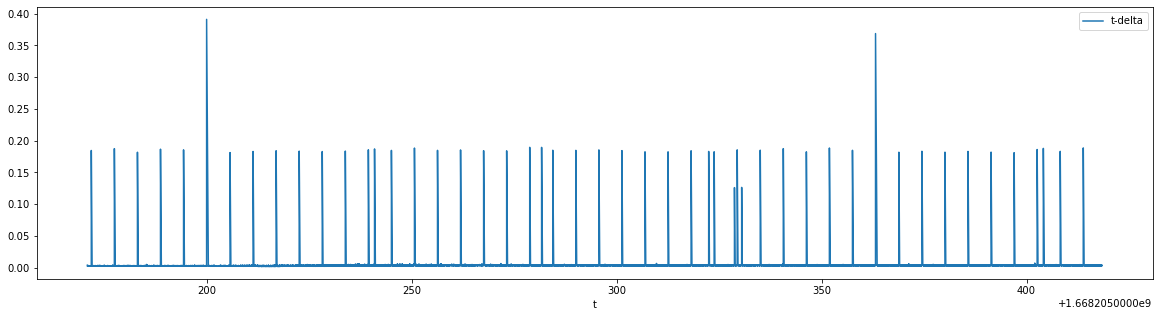

In [54]:
df-0:1000].plot.line(x='t', y='t-delta', style='-')

In [55]:
# connect to the opc-ua client
client.disconnect()

In [24]:
root = client.get_root_node()
print("Root node is: {:s} ".format(str(root)))

def browse_recursive(node):
    for childId in node.get_children():
        ch = client.get_node(childId)
        print(ch.get_node_class())
        if ch.get_node_class() == opcua.ua.NodeClass.Object:
            browse_recursive(ch)
        elif ch.get_node_class() == opcua.ua.NodeClass.Variable:
            try:
                print("{bn} has value {val}".format(
                    bn=ch.get_browse_name(),
                    val=str(ch.get_value()))
                )
            except ua.uaerrors._auto.BadWaitingForInitialData:
                pass

browse_recursive(root)

Root node is: i=84 


OSError: [Errno 9] Bad file descriptor

In [25]:
objects = client.get_objects_node()
childs = objects.get_children()

OSError: [Errno 9] Bad file descriptor